### GOAL



In [43]:
import pandas as pd

sequences = "../data/sdab_data.csv"
predictions = "../predictions/all_tm_comparisons_tempro.csv"
nbthermo = "../data/database_NbThermo.txt"

# Function to replace a specific letter in a string
def replace_letter(text, old_letter, new_letter):
    if isinstance(text, str):
        return text.replace(old_letter, new_letter)
    return text

df_s = pd.read_csv(sequences, header=0, sep=";")
df_p = pd.read_csv(predictions, header=0, sep=";")
df_nbthermo = pd.read_csv(nbthermo, header=0, sep="\t")

df_s['id'] = df_s['id'].apply(lambda x: replace_letter(x, '>', ''))

In [44]:
cols = df_s.columns.tolist()
cols += ['Type','Refolding (%)', 'Tm_method']

In [45]:
df_s = pd.merge(df_s, df_nbthermo[['Origin','Type','Refolding (%)', 'Tm_method', 'Raw']], left_on=['source','seq'], right_on=['Origin','Raw'], how='left')
df_s = df_s[cols]
df_s.head()

,id,name,seq,tm,doi,source,fr1,cdr1,fr2,cdr2,fr3,cdr3,fr4,target1,target2,target3,target4,Type,Refolding (%),Tm_method
0,sdab1,NRL-N-C2,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,"67,5",https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN,Natural,63.0,Circular dichroism
1,sdab2,NRL-N-C2-hop,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,65,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN,Semi-Synthetic,56.0,Circular dichroism
2,sdab3,NRL-N-E2,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,62,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVQAGGSLRLSC,AASGRTDSTQHMA,WFRQAPGKEREFV,TAIQWRGGGT,SYTDSVKGRFTISRDNAKNTVYLEMNSLKPEDTAVYYC,ATNTRWTYFSPTVPDRYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN,Natural,50.0,Circular dichroism
3,sdab4,NRL-N-E2-hop,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,62,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVQAGGSLRLSC,AASGRTDSTQHMA,WFRQAPGKEREFV,TAIQWRGGGT,SYTDSVKGRFTISRDNAKNTVYLEMNSLKPEDTAVYYC,ATNTRWTYFSPTVPDRYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN,Semi-Synthetic,44.0,Circular dichroism
4,sdab5,NRL-N-E10,DVQLQASGGGLVQAGGSLRLSCAASARTFYTMGWFRQVLGKDREFV...,70,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,DVQLQASGGGLVQAGGSLRLSC,AASARTFYTMG,WFRQVLGKDREFV,GAIRWGVYATT,RYADSVKGRFSISRDDATNTVALQMNSLKPEDTAVYYC,AARAGPLGFELSATSSAEYDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN,Natural,41.0,Circular dichroism


In [46]:
df_p = pd.merge(df_p,df_s[['id','source','Type','Refolding (%)', 'Tm_method']])
df_p.head()

,id,name,Actual_Tm,TEMPRO,ProTDet,DeepStabP_Cell37,DeepStabP_Lysate37,DeepStabP_Lysate22,source,Type,Refolding (%),Tm_method
0,sdab1,NRL-N-C2,67.5,68.172410,51.995130,54.784729,55.583185,55.945881,Llama,Natural,63.0,Circular dichroism
1,sdab2,NRL-N-C2-hop,65.0,65.598465,51.983513,54.160854,54.650911,54.055810,Llama,Semi-Synthetic,56.0,Circular dichroism
2,sdab3,NRL-N-E2,62.0,64.533890,52.293830,53.637676,54.985965,55.412668,Llama,Natural,50.0,Circular dichroism
3,sdab4,NRL-N-E2-hop,62.0,62.813786,52.310158,52.468925,53.243382,52.691291,Llama,Semi-Synthetic,44.0,Circular dichroism
4,sdab5,NRL-N-E10,70.0,71.235620,52.305046,51.909128,53.413302,54.142093,Llama,Natural,41.0,Circular dichroism


                                source   id
0                               Alpaca   31
1  Arabian camel (Camelus dromedarius)   17
2                                Camel  170
3                            Dromedary    1
4                                Human    2
5                                Llama  293
6                              Unknown   20


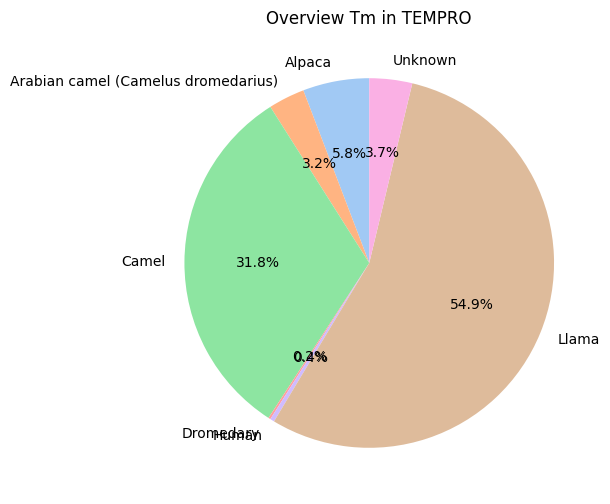

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample DataFrame
data = df_p[['id','source']].groupby('source').count().reset_index()
print(data)

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(data['id'], labels=data['source'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Overview Tm in TEMPRO')

# Display the plot
plt.show()

In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

melted_df = pd.melt(df_p[['id','TEMPRO','ProTDet','DeepStabP_Cell37','DeepStabP_Lysate37','DeepStabP_Lysate22']], id_vars=['id'], var_name='PredModel', value_name='Value')
melted_df.head()

,id,PredModel,Value
0,sdab1,TEMPRO,68.172410
1,sdab2,TEMPRO,65.598465
2,sdab3,TEMPRO,64.533890
3,sdab4,TEMPRO,62.813786
4,sdab5,TEMPRO,71.235620


In [62]:
melted_df = pd.merge(melted_df,df_p[['id','name','Actual_Tm','source','Type', 'Refolding (%)', 'Tm_method']])
melted_df['residuals'] = melted_df['Actual_Tm'] - melted_df['Value']

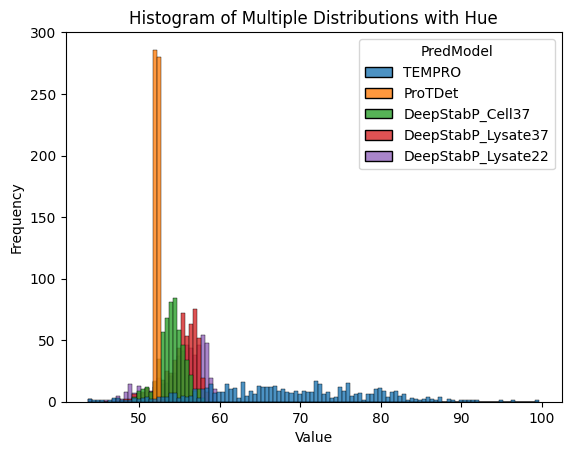

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.histplot(data=melted_df, x='Value', hue='PredModel', binwidth=0.5, alpha=0.8)

plt.title('Histogram of Multiple Distributions with Hue')
plt.xlabel('Value')
plt.ylabel('Frequency')
# plt.legend(title='Category')
plt.show()

In [65]:
# Calculate standard deviation of residuals
residual_std = np.std(melted_df['residuals'])
print(f"Standard Deviation of Residuals: {residual_std}")

Standard Deviation of Residuals: 10.508629264759595


In [68]:
melted_df.head()

,id,PredModel,Value,name,Actual_Tm,source,Type,Refolding (%),Tm_method,residuals
0,sdab1,TEMPRO,68.172410,NRL-N-C2,67.5,Llama,Natural,63.0,Circular dichroism,-0.672410
1,sdab1,ProTDet,51.995130,NRL-N-C2,67.5,Llama,Natural,63.0,Circular dichroism,15.504870
2,sdab1,DeepStabP_Cell37,54.784729,NRL-N-C2,67.5,Llama,Natural,63.0,Circular dichroism,12.715271
3,sdab1,DeepStabP_Lysate37,55.583185,NRL-N-C2,67.5,Llama,Natural,63.0,Circular dichroism,11.916815
4,sdab1,DeepStabP_Lysate22,55.945881,NRL-N-C2,67.5,Llama,Natural,63.0,Circular dichroism,11.554119


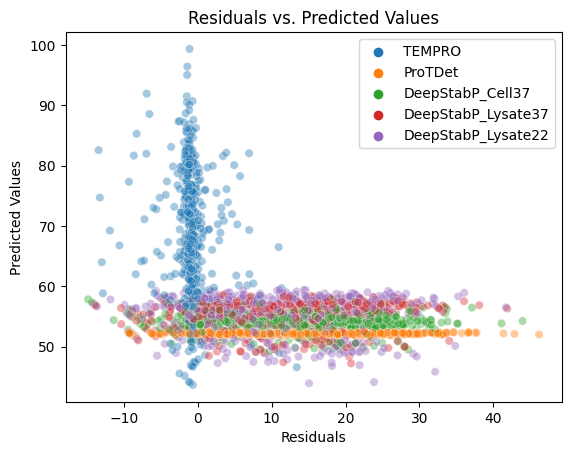

In [74]:
# Plot residuals
plt.figure()
sns.scatterplot(x='residuals', y='Value', data=melted_df, hue='PredModel', alpha=0.4)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals vs. Predicted Values')
plt.legend()
plt.show()

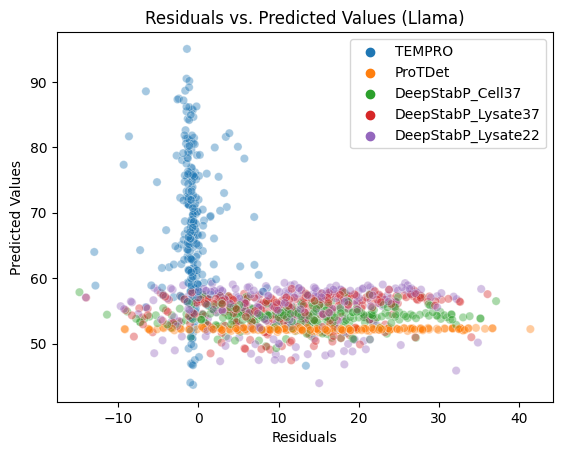

In [76]:
# Plot residuals
plt.figure()
sns.scatterplot(x='residuals', y='Value', data=melted_df[melted_df['source']=='Llama'], hue='PredModel', alpha=0.4)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals vs. Predicted Values (Llama)')
plt.legend()
plt.show()

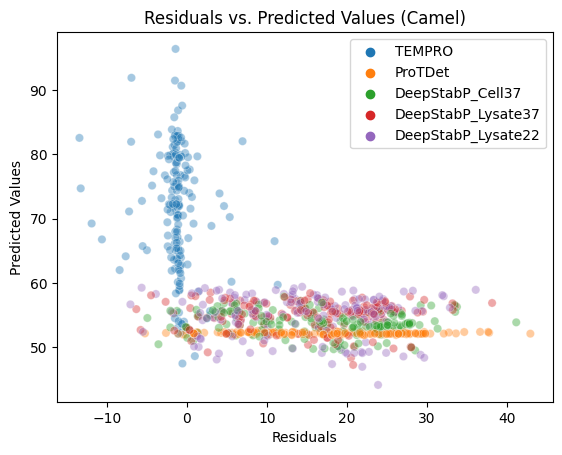

In [77]:
# Plot residuals
plt.figure()
sns.scatterplot(x='residuals', y='Value', data=melted_df[melted_df['source']=='Camel'], hue='PredModel', alpha=0.4)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals vs. Predicted Values (Camel)')
plt.legend()
plt.show()

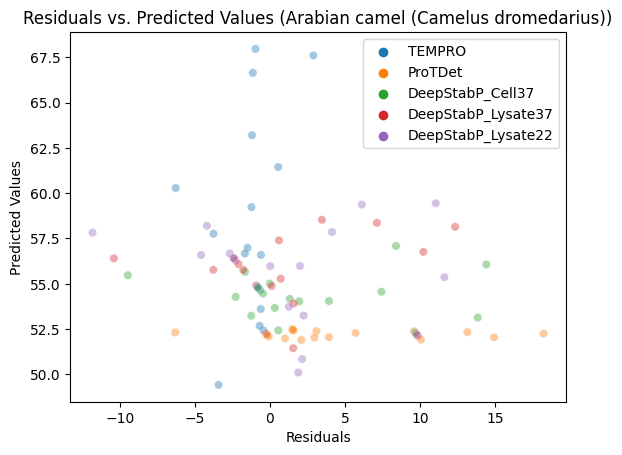

In [78]:
# Plot residuals
plt.figure()
sns.scatterplot(x='residuals', y='Value', data=melted_df[melted_df['source']=='Arabian camel (Camelus dromedarius)'], hue='PredModel', alpha=0.4)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals vs. Predicted Values (Arabian camel (Camelus dromedarius))')
plt.legend()
plt.show()

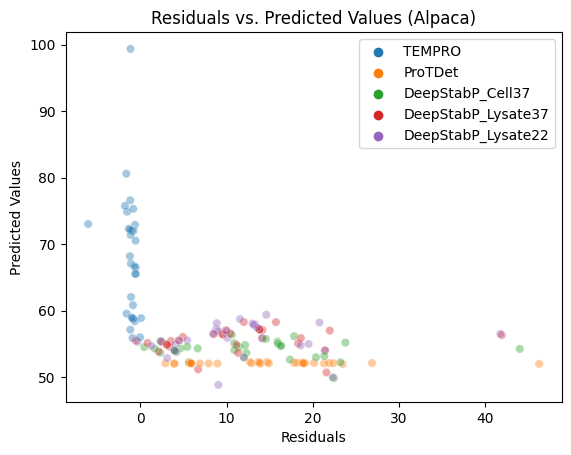

In [79]:
# Plot residuals
plt.figure()
sns.scatterplot(x='residuals', y='Value', data=melted_df[melted_df['source']=='Alpaca'], hue='PredModel', alpha=0.4)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residuals vs. Predicted Values (Alpaca)')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_uncertainty(y_true, y_pred, s):
    
    print(s)
    print("Prediction datasize", len(y_true))
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error: {mae}")

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Calculate RMSE
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse}")
    print()

for s in ['Alpaca','Camel','Llama']:
    get_uncertainty(melted_df.loc[(melted_df['source']==s) & (melted_df['PredModel']=='TEMPRO'),'Actual_Tm'], 
                    melted_df.loc[(melted_df['source']==s) & (melted_df['PredModel']=='TEMPRO'),'Value'], s)


Alpaca
Prediction datasize 31
Mean Absolute Error: 1.0924788387096769
Mean Squared Error: 2.1614544483821905
Root Mean Squared Error: 1.470188575789579

Camel
Prediction datasize 170
Mean Absolute Error: 2.065171144352941
Mean Squared Error: 10.091908573632075
Root Mean Squared Error: 3.1767764437605734

Llama
Prediction datasize 293
Mean Absolute Error: 1.629867785358362
Mean Squared Error: 8.368516489961369
Root Mean Squared Error: 2.892838828894788



In [91]:
melted_df[(melted_df['residuals']>3) & (melted_df['PredModel']=='TEMPRO')]

,id,PredModel,Value,name,Actual_Tm,source,Type,Refolding (%),Tm_method,residuals
45,sdab10,TEMPRO,76.113266,DesAb-HSA-P2,80.00,Unknown,Synthetic,NaN,DSF (SYPRO),3.886734
150,sdab31,TEMPRO,70.867905,NIH-CoVnb-112,74.40,Llama,Natural,73.0,Circular dichroism,3.532095
365,sdab74,TEMPRO,66.507550,NbPep24,77.45,Camel,NaN,NaN,NaN,10.942450
420,sdab85,TEMPRO,60.188230,NbD3,65.75,Camel,NaN,NaN,NaN,5.561770
440,sdab89,TEMPRO,59.714430,NbPep34,71.05,Camel,NaN,NaN,NaN,11.335570
450,sdab91,TEMPRO,71.973595,NbPep36,76.60,Camel,NaN,NaN,NaN,4.626405
505,sdab102,TEMPRO,69.347790,NbPep56,76.30,Llama,NaN,NaN,NaN,6.952210
700,sdab141,TEMPRO,82.058320,cAbAn33_1-1-0,89.00,Camel,NaN,NaN,NaN,6.941680
720,sdab145,TEMPRO,73.006520,cAbGFP4_1-1-0,76.20,Llama,NaN,NaN,NaN,3.193480
725,sdab146,TEMPRO,80.080956,cAbGFP4_1-1-1,85.00,Llama,NaN,NaN,NaN,4.919044


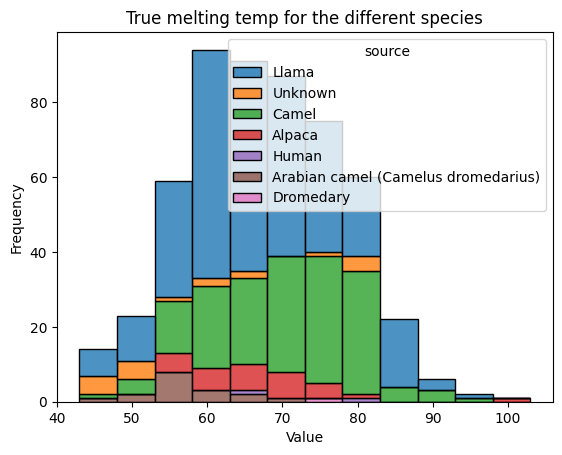

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.histplot(data=df_p, x='Actual_Tm', hue='source', multiple='stack', binwidth=5, alpha=0.8)

plt.title('True melting temp for the different species')
plt.xlabel('Value')
plt.ylabel('Frequency')
# plt.legend(title='Category')
plt.show()

In [96]:
df_p[['Actual_Tm','source']].groupby('source').mean().reset_index()

,source,Actual_Tm
0,Alpaca,66.779032
1,Arabian camel (Camelus dromedarius),57.088235
2,Camel,70.300090
3,Dromedary,75.300000
4,Human,72.500000
5,Llama,66.547595
6,Unknown,59.625500
